# Deep Learning
## Le deep learning est l'un des outils les performants pour modéliser les processus cognitifs

<h1 style="color:blue;">Plan de la démonstration</h1>
<i>
<ol>
    <li> Mettre en place l'environnement</li>
    <li>Installer Keras </li>
    <li>Importer les lirairies et les modules spécifiques</li>
    <li>Charger les images des nombres du package MNIST</li>
    <li>Preparer les données pour KERAS</li>
    <li>Définir les labels des chiffres</li>
    <li>Définir un modèle d'architecture du réseau</li>
    <li>Compiler le modèle spécifié</li>
    <li>Créer le modèle sur les données d'apprentissage</li>
    <li>Evaluer le modèle sur des données de test </li>
    <li>Visualiser les résultats obtenus</li> 
 </ol>
 </i>


 ## Mise en place de l'environnement chargement des packages numpy et theano

In [2]:
import numpy
import theano

 ## Installer Keras

In [3]:
import keras

Using TensorFlow backend.


In [4]:
print(keras.__version__)

2.2.2


##   Importer les lirairies et les modules spécifiques

In [5]:
from keras.models import Sequential

In [6]:
import numpy as np

In [7]:
from keras.layers import Dense, Dropout, Activation, Flatten

In [8]:
from keras.layers import Convolution2D, MaxPooling2D

In [9]:
from keras.utils import np_utils

## Charger les images des nombres du package MNIST

In [10]:
from keras.datasets import mnist
(X_train, y_train), (X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [12]:
print(X_train.shape)

(60000, 28, 28)


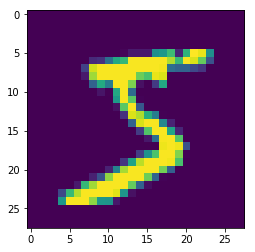

In [13]:
%matplotlib inline
from pylab import *
matplotlib.pylab.imshow(X_train[0])

## Preparer les données pour KERAS

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [15]:
print(X_train.shape)

(60000, 28, 28, 1)


In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
print(y_train.shape)

(60000,)


## Définir les labels des chiffres

In [19]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [20]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [21]:
print(Y_train.shape)

(60000, 10)


## Définir un modèle d'architecture du réseau

In [22]:
model = Sequential()

L'apprentissage approfondi (Deep Learning) se réfère à des réseaux de neurones  à couches cachées multiples. 

Ces réseaux peuvent apprendre des éléments de plus en plus abstraits dans les données d'entrée. 

L'apprentissage en profondeur a entraîné des progrès majeurs dans la vision par ordinateur. Nous sommes maintenant en mesure de classer les images, de trouver des objets dans ces images, et même de les étiqueter avec des légendes. Pour ce faire, les réseaux de neurones profonds avec de nombreuses couches cachées peuvent apprendre des fonctionnalités plus complexes à partir de l'image d'entrée brute, ainsi :

    1.Les premières couches cachées d’analyser les éléments élémentaires d’une image,
    2.Ensuite, chaque couche (ou filtre) ultérieur apprend les éléments plus complexes.
    3.Enfin, la dernière couche permet de classer l'image comme un chat ou un kangourou.

Ces types de réseaux neuronaux profonds s'appellent Convolutional Neural Networks.

En bref, les réseaux neuronaux convolutionnels (CNN) sont des réseaux neuronaux multicouches (qui comptent parfois jusqu'à 17 couches ou plus) et supposent que les données d'entrée sont des images.


![Alt text](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png "Architecture du réseau")

In [23]:
model.add(Convolution2D(32, 3, 3,activation='relu', input_shape = (28, 28,1)))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':


In [25]:
print(model.output_shape)

(None, 26, 26, 32)


In [26]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [27]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Compiler le modèle spécifié

In [28]:
model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])


## Créer le modèle sur les données d'apprentissage

In [29]:
model.fit(X_train, Y_train,
           batch_size=32, nb_epoch=1, verbose=1)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/1
60000/60000 [==============================] - 212s 4ms/step - loss: 0.2215 - acc: 0.9328


## Evaluer le modèle sur des données de test

In [26]:
score = model.evaluate(X_test, Y_test, verbose=1)

 9856/10000 [============================>.] - ETA: 0s

In [32]:
np.random.seed(2)
small_test = np.random.choice(X_test.shape[0], 10)

print(small_test)

[7336 2575 6637 2514 1099 4770  433 6751 2773 5167]


## Visualiser les résultats obtenus 

View_image est une fonction qui permet de visualier les images

In [33]:
def view_image(image, label="", predicted='', size=4):
    """View a single image."""
    plt.figure(figsize = (size, size))
    plt.imshow(image.reshape((28, 28)), cmap=cm.gray, )
    plt.tick_params(axis='x',which='both',  bottom='off',top='off', labelbottom='on')
    plt.tick_params(axis='y',which='both',  left='off',top='off', labelleft='on')
    show()
    if predicted == '':
        print("Label: %s" % label)
    else:
        print('Label: ', str(label), 'Predicted: ', str(predicted))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


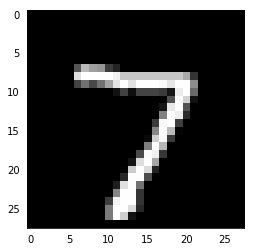

Label: 7


In [34]:
view_image(X_test[0], y_test[0])



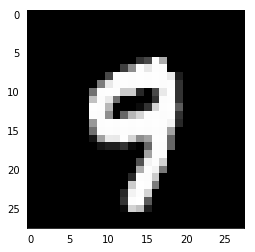

Label: 9


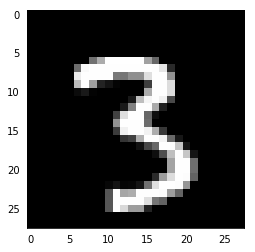

Label: 3


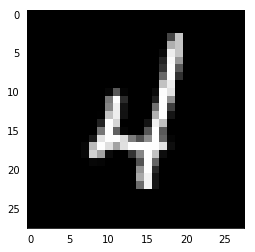

Label: 4


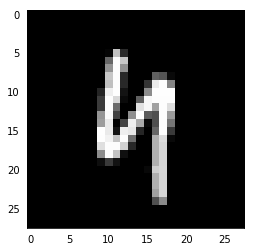

Label: 4


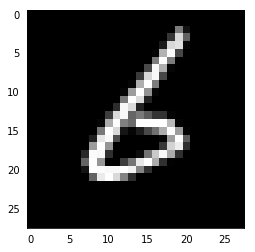

Label: 6


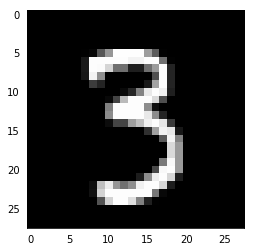

Label: 3


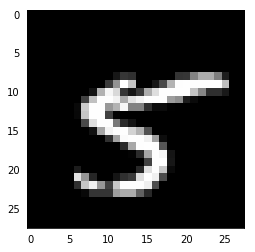

Label: 5


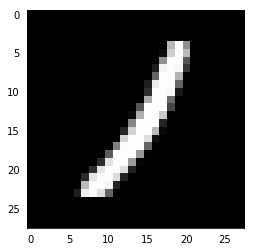

Label: 1


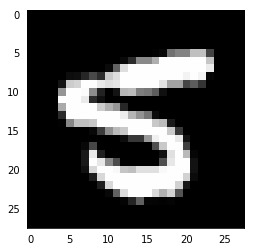

Label: 5


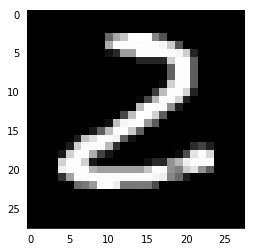

Label: 2


In [35]:
for i in small_test : 
    view_image(X_test[i], y_test[i])